Fashion-MNIST Classification: From Linear Models to CNNs in PyTorch

In [3]:
import torch
from torch import nn
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

print(torch.__version__)
print(torchvision.__version__)

2.8.0+cpu
0.23.0+cpu


In [4]:
device="cuda" if torch.cuda.is_available() else"cpu"
device

'cpu'

In [ ]:
train_data=datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=transforms.ToTensor(),
    target_transform=None
)

test_data=datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=transforms.ToTensor(),
    target_transform=None
)

In [ ]:
len(train_data),len(test_data)

(60000, 10000)

In [ ]:
class_name=train_data.classes
class_name

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
class_to_idx=train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [ ]:
train_data.data.shape

torch.Size([60000, 28, 28])

image shapetorch.Size([1, 28, 28])


Text(0.5, 1.0, '9')

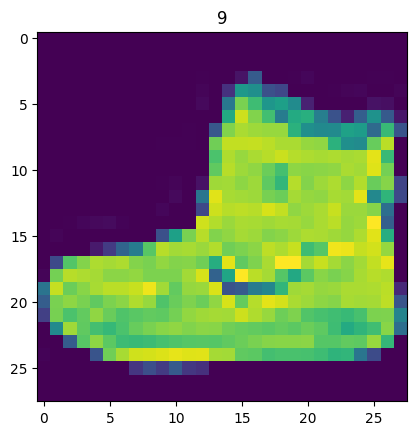

In [ ]:
image, label=train_data[0]
print(f"image shape{image.shape}")
plt.imshow(image.squeeze())
plt.title(label)

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

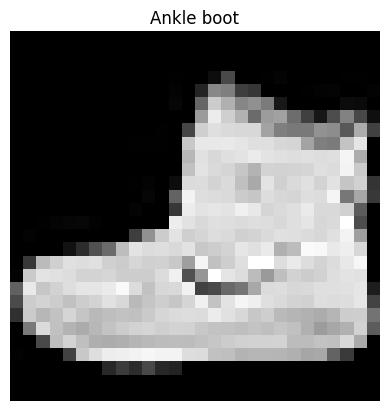

In [ ]:
plt.imshow(image.squeeze(),cmap="gray")
plt.title(class_name[label])
plt.axis(False
        )

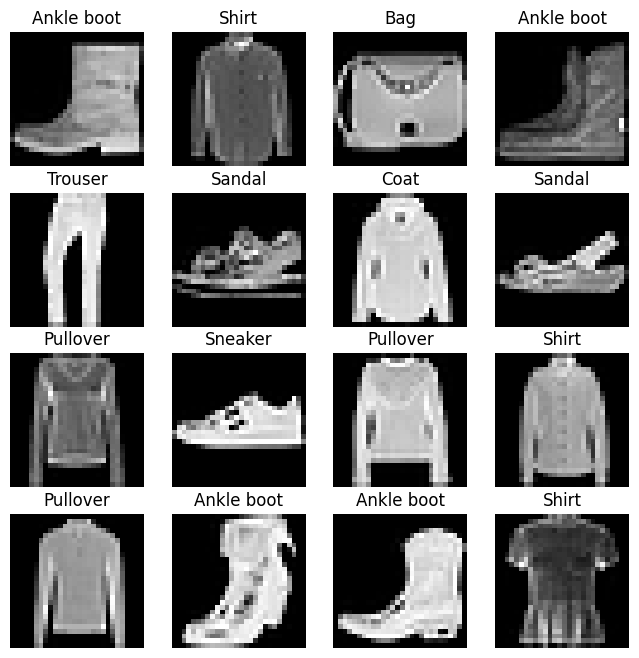

In [ ]:
#plot more images random
torch.manual_seed(42)
fig=plt.figure(figsize=(8,8))
rows,cols=4,4
for i in range (1,rows*cols+1):
  random_idx=torch.randint(0,len(train_data),size=[1]).item()
  img,label=train_data[random_idx]
  fig.add_subplot(rows,cols,i)
  plt.imshow(img.squeeze(),cmap="gray")
  plt.title(class_name[label])
  plt.axis(False)


In [ ]:
from torch.utils.data import DataLoader

BATCH_SIZE=32

train_dataloader=DataLoader(dataset=train_data,
                            batch_size=BATCH_SIZE,
                            shuffle=True)

test_dataloader=DataLoader(dataset=test_data,
                           batch_size=BATCH_SIZE,
                           shuffle=False)

train_dataloader,test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x784c055bfec0>,
 <torch.utils.data.dataloader.DataLoader at 0x784c055beae0>)

In [ ]:
len(train_dataloader),len(test_dataloader)

(1875, 313)

In [ ]:
train_features_batch, train_labels_batch=next(iter(train_dataloader))
train_features_batch

tensor([[[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0157, 0.0000, 0.0039],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],


        [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],


        [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..

In [ ]:
train_features_batch.shape,train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

image size:torch.Size([1, 28, 28]) 
Label:6 label size:torch.Size([])


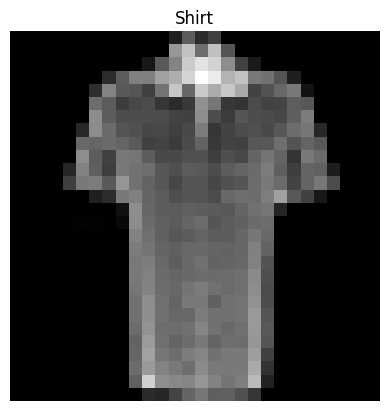

In [ ]:
torch.manual_seed(42)
random_idx=torch.randint(0,len(train_features_batch),size=[1]).item()
rand_img,rand_label=train_features_batch[random_idx],train_labels_batch[random_idx]
plt.imshow(rand_img.squeeze(),cmap="gray")
plt.title(class_name[rand_label])
plt.axis(False);
print(f"image size:{rand_img.shape} ")
print(f"Label:{rand_label} label size:{rand_label.shape}")


In [ ]:
from torch import nn
class FashionMNISTModel0(nn.Module):
  def __init__(self,input_shape:int,
              hidden_units:int,
               output_shape:int):
    super().__init__()

    self.layer_stacks=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,out_features=hidden_units),
        nn.Linear(in_features=hidden_units,out_features=output_shape)
    )

  def forward(self,x):
    return self.layer_stacks(x)


In [ ]:
torch.manual_seed(42)
model_0=FashionMNISTModel0(input_shape=28*28,
                           hidden_units=10,
                           output_shape=10).to(device)

model_0

FashionMNISTModel0(
  (layer_stacks): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [ ]:
import requests
from pathlib import Path

if Path("helper_funstions.py").is_file():
  print("file already downloaded, skipping")
else:
  print("downloading helper_funcitons.py")
  request=requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")
  with open("helper_functions.py","wb") as f:
    f.write(request.content)

downloading helper_funcitons.py


In [ ]:
from helper_functions import accuracy_fn

loss_fn=nn.CrossEntropyLoss()

optimizer=torch.optim.SGD(params=model_0.parameters(),lr=0.01)

In [ ]:
from timeit import default_timer as timer

def print_train_time(start:float,
                     end:float,
                     device: torch.device = None ):
  """prints the difference between start and end time"""

  total_time=end-start
  print(f"train time on:{device}:{total_time:.3f}seconds")
  return total_time

In [ ]:
start_time=timer()

end_time=timer()

print_train_time(start=start_time,end=end_time)

train time on:None:0.000seconds


4.904399997940345e-05

In [ ]:
from tqdm.auto import tqdm

torch.manual_seed(42)

train_time_start=timer()
epochs=4



for epoch in tqdm(range(epochs)):
  print(f"Epoch:{epoch}")
  train_loss=0

  for batch,(X,y) in enumerate(train_dataloader):

    X,y=X.to(device),y.to(device)
    model_0.train()

    y_pred=model_0(X)
    loss=loss_fn(y_pred,y)
    train_loss+=loss

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    if batch%350==0:
      print(f"looked at{batch * len(X)}/{len(train_dataloader.dataset)} samples")

  train_loss=train_loss/len(train_dataloader)


  test_loss,test_acc=0,0
  model_0.eval()
  with torch.inference_mode():
    for X_test,y_test in test_dataloader:
      X_test,y_test=X_test.to(device),y_test.to(device)
      test_pred=model_0(X_test)

      test_loss+=loss_fn(test_pred,y_test)

      test_acc+= accuracy_fn(y_true=y_test,y_pred=test_pred.argmax(dim=1))

    test_loss/=len(test_dataloader)

    test_acc/=len(test_dataloader)

  print(f"train Loss:{train_loss:.4f} | test Loss:{test_loss:.4f}|test accuracy:{test_acc:.4f}")

  train_time_end=timer()

  total_train_time_model_0=print_train_time(start=train_time_start,end=train_time_end,
                                            device=str(next(model_0.parameters()).device))


  0%|          | 0/4 [00:00<?, ?it/s]

Epoch:0
looked at0/60000 samples
looked at11200/60000 samples
looked at22400/60000 samples
looked at33600/60000 samples
looked at44800/60000 samples
looked at56000/60000 samples
train Loss:0.9096 | test Loss:0.6290|test accuracy:78.6342
train time on:cuda:0:9.253seconds
Epoch:1
looked at0/60000 samples
looked at11200/60000 samples
looked at22400/60000 samples
looked at33600/60000 samples
looked at44800/60000 samples
looked at56000/60000 samples
train Loss:0.5573 | test Loss:0.5441|test accuracy:81.1302
train time on:cuda:0:18.585seconds
Epoch:2
looked at0/60000 samples
looked at11200/60000 samples
looked at22400/60000 samples
looked at33600/60000 samples
looked at44800/60000 samples
looked at56000/60000 samples
train Loss:0.5027 | test Loss:0.5137|test accuracy:81.9988
train time on:cuda:0:28.548seconds
Epoch:3
looked at0/60000 samples
looked at11200/60000 samples
looked at22400/60000 samples
looked at33600/60000 samples
looked at44800/60000 samples
looked at56000/60000 samples
train L

In [ ]:
torch.manual_seed(42)

def eval_model(model:torch.nn.Module,
               data_loader:torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               accuracy_fn):
  """returns a dictionary of model predicting on dataloader"""

  loss,acc=0,0
  model.eval()
  with torch.inference_mode():
    for X,y in data_loader:
      X,y=X.to(device),y.to(device)
      y_pred=model(X)



      loss+=loss_fn(y_pred,y)

      acc+=accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))

    loss/=len(data_loader)
    acc/=len(data_loader)
  return{"model_name":model.__class__.__name__,
         "model_loss":loss.item(),
         "model_accuracy":acc}

In [ ]:
model_0_results=eval_model(model_0,test_dataloader,loss_fn,accuracy_fn)

In [ ]:
print(model_0_results)

{'model_name': 'FashionMNISTModel0', 'model_loss': 0.4944237470626831, 'model_accuracy': 82.78753993610223}


In [ ]:
torch.manual_seed(42)

class FashionMNISTModel1(nn.Module):
  def __init__(self,input_shape:int,
               hidden_units:int,
               output_shape:int):
    super().__init__()
    self.layer_stacks=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,out_features=output_shape)
    )

  def forward(self,x):
    return self.layer_stacks(x)

In [ ]:
class_name

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
torch.manual_seed(42)

model_1=FashionMNISTModel1(input_shape=28*28,
                           hidden_units=10,
                           output_shape=len(class_name)).to(device)

In [ ]:
from helper_functions import accuracy_fn

loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model_1.parameters(),
                          lr=0.01)

In [ ]:
def train_step(model:torch.nn.Module,
               dataloader:torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               optimizer:torch.optim.Optimizer,
               accuracy_fn,
               device:torch.device=device):
  torch.manual_seed(42)


  model.train()
  train_loss,train_accuracy=0,0
  for batch, (X, y) in enumerate(dataloader):
    X,y=X.to(device),y.to(device)

    y_pred=model(X)

    loss=loss_fn(y_pred,y)
    train_loss+=loss
    train_accuracy+=accuracy_fn(y_true=y,y_pred=y_pred.argmax(dim=1))
    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    if(batch%350==0):
      print(f"looked at :{batch*len(X)}/{len(dataloader.dataset)}")
  train_loss/=len(dataloader)
  train_accuracy/=len(dataloader)
  print(f"Train Loss:{train_loss:.4f}, train accuracy:{train_accuracy:.4f}")

In [ ]:
def test_step(model:torch.nn.Module,
              dataloader:torch.utils.data.DataLoader,
              loss_fn:torch.nn.Module,
              accuracy_fn,
              device:torch.device=device
              ):
  model.eval()
  test_loss,test_acc=0,0
  with torch.inference_mode():
    for X,y in dataloader:
      X,y=X.to(device),y.to(device)
      test_pred=model(X)

      loss=loss_fn(test_pred,y)

      test_loss+=loss

      test_acc+=accuracy_fn(y_true=y,y_pred=test_pred.argmax(dim=1))
    test_loss/=len(dataloader)
    test_acc/=len(dataloader)
    print(f"test loss:{test_loss:.4f} | test accuracy:{test_acc:.4f}")



In [ ]:
torch.manual_seed(42)

from timeit import default_timer as timer

train_timer_start_1=timer()
epochs=4

for epoch in tqdm(range(epochs)):
  print("Epoch:",epoch)
  train_step(model=model_1,dataloader=train_dataloader,loss_fn=loss_fn,accuracy_fn=accuracy_fn,optimizer=optimizer,device=device)

  test_step(model=model_1,dataloader=test_dataloader,loss_fn=loss_fn,accuracy_fn=accuracy_fn,device=device)

train_timer_stop_1=timer()
total_train_time_model_1=print_train_time(start=train_timer_start_1,
                                          end=train_timer_stop_1
                                          )

  0%|          | 0/4 [00:00<?, ?it/s]

Epoch: 0
looked at :0/60000
looked at :11200/60000
looked at :22400/60000
looked at :33600/60000
looked at :44800/60000
looked at :56000/60000
Train Loss:1.1612, train accuracy:59.7167
test loss:0.7217 | test accuracy:72.8035
Epoch: 1
looked at :0/60000
looked at :11200/60000
looked at :22400/60000
looked at :33600/60000
looked at :44800/60000
looked at :56000/60000
Train Loss:0.6336, train accuracy:77.2883
test loss:0.6082 | test accuracy:78.2049
Epoch: 2
looked at :0/60000
looked at :11200/60000
looked at :22400/60000
looked at :33600/60000
looked at :44800/60000
looked at :56000/60000
Train Loss:0.5612, train accuracy:80.2467
test loss:0.5659 | test accuracy:80.0020
Epoch: 3
looked at :0/60000
looked at :11200/60000
looked at :22400/60000
looked at :33600/60000
looked at :44800/60000
looked at :56000/60000
Train Loss:0.5300, train accuracy:81.3917
test loss:0.5465 | test accuracy:80.7808
train time on:None:40.060seconds


In [ ]:
model_0_results

{'model_name': 'FashionMNISTModel0',
 'model_loss': 0.4944237470626831,
 'model_accuracy': 82.78753993610223}

In [ ]:
model_1_results=eval_model(model=model_1,data_loader=test_dataloader,loss_fn=loss_fn,accuracy_fn=accuracy_fn)
model_1_results

{'model_name': 'FashionMNISTModel1',
 'model_loss': 0.5464851260185242,
 'model_accuracy': 80.78075079872204}

In [ ]:
class FashionMNISTModel2(nn.Module):
  def __init__(self,input_shape:int,hidden_units:int,output_shape:int):
    super().__init__()
    self.conv_block1=nn.Sequential(
        nn.Conv2d(in_channels=input_shape,out_channels=hidden_units,
                  kernel_size=3,padding=1,stride=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,out_channels=hidden_units,
                  kernel_size=3,padding=1,stride=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
        )

    self.conv_block2=nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,out_channels=hidden_units,
                  kernel_size=3,padding=1,stride=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,out_channels=output_shape,
                  kernel_size=3,padding=1,stride=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.classifier=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7,out_features=output_shape)
    )

  def forward(self,x):
    x=self.conv_block1(x)
    #print(x.shape)
    x=self.conv_block2(x)
    #print(x.shape)
    x=self.classifier(x)
    return x



In [ ]:
torch.manual_seed(42)
model_2=FashionMNISTModel2(input_shape=1,hidden_units=10,output_shape=len(class_name)).to(device)
model_2

FashionMNISTModel2(
  (conv_block1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [ ]:
torch.manual_seed(42)
images=torch.rand(32,3,64,64)
image_0=images[0]
print("images shape:",images.shape)
print("single image shape",image_0.shape)
print("single image:",image_0)

images shape: torch.Size([32, 3, 64, 64])
single image shape torch.Size([3, 64, 64])
single image: tensor([[[0.8823, 0.9150, 0.3829,  ..., 0.1587, 0.6542, 0.3278],
         [0.6532, 0.3958, 0.9147,  ..., 0.2083, 0.3289, 0.1054],
         [0.9192, 0.4008, 0.9302,  ..., 0.5535, 0.4117, 0.3510],
         ...,
         [0.1457, 0.1499, 0.3298,  ..., 0.9624, 0.6400, 0.7409],
         [0.1709, 0.5797, 0.6340,  ..., 0.6885, 0.2405, 0.5956],
         [0.9199, 0.1247, 0.3573,  ..., 0.6752, 0.2058, 0.5027]],

        [[0.1458, 0.9024, 0.9217,  ..., 0.1868, 0.6352, 0.8431],
         [0.9549, 0.4435, 0.6924,  ..., 0.1168, 0.7160, 0.5462],
         [0.1616, 0.1054, 0.8614,  ..., 0.4531, 0.4736, 0.9448],
         ...,
         [0.4309, 0.3986, 0.1907,  ..., 0.9444, 0.2848, 0.3776],
         [0.7948, 0.6855, 0.1009,  ..., 0.6147, 0.7747, 0.2323],
         [0.5840, 0.9795, 0.3277,  ..., 0.3549, 0.1263, 0.1280]],

        [[0.5027, 0.4195, 0.8893,  ..., 0.3084, 0.1567, 0.7860],
         [0.7310, 0.9307

In [ ]:
torch.manual_seed(42)
conv_layer=nn.Conv2d(in_channels=3,out_channels=10,
                     kernel_size=3,
                     padding=0,
                     stride=1)

conv_output=conv_layer(image_0)
conv_output.shape

torch.Size([10, 62, 62])

In [ ]:
torch.manual_seed(42)

test_tensor=torch.randn(size=(1,28,28)).to(device)

model_2(test_tensor.unsqueeze(0))

tensor([[ 0.0505, -0.0729,  0.0821, -0.0451, -0.0044,  0.0383,  0.0061, -0.0016,
         -0.0127, -0.0081]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [ ]:
test_tensor.unsqueeze(0)
test_tensor.shape

torch.Size([1, 28, 28])

In [ ]:
from helper_functions import accuracy_fn
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model_2.parameters(),
                          lr=0.01)

In [ ]:
torch.manual_seed(42)

from timeit import default_timer as timer
train_time_start_m2=timer()

epochs=10

for epoch in tqdm(range(epochs)):
  print("EPoch:",epoch)
  train_step(model=model_2,dataloader=train_dataloader,loss_fn=loss_fn,optimizer=optimizer,device=device,accuracy_fn=accuracy_fn)

  test_step(model=model_2,dataloader=test_dataloader,loss_fn=loss_fn,accuracy_fn=accuracy_fn,device=device)

train_time_end_m2=timer()
total_train_time_model_2=print_train_time(start=train_time_start_m2,
                                          end=train_time_end_m2,
                                          device=device)

  0%|          | 0/10 [00:00<?, ?it/s]

EPoch: 0
looked at :0/60000
looked at :11200/60000
looked at :22400/60000
looked at :33600/60000
looked at :44800/60000
looked at :56000/60000
Train Loss:1.0379, train accuracy:62.3467
test loss:0.6253 | test accuracy:76.9269
EPoch: 1
looked at :0/60000
looked at :11200/60000
looked at :22400/60000
looked at :33600/60000
looked at :44800/60000
looked at :56000/60000
Train Loss:0.5496, train accuracy:80.0783
test loss:0.4898 | test accuracy:82.5479
EPoch: 2
looked at :0/60000
looked at :11200/60000
looked at :22400/60000
looked at :33600/60000
looked at :44800/60000
looked at :56000/60000
Train Loss:0.4561, train accuracy:83.4800
test loss:0.4391 | test accuracy:84.3750
EPoch: 3
looked at :0/60000
looked at :11200/60000
looked at :22400/60000
looked at :33600/60000
looked at :44800/60000
looked at :56000/60000
Train Loss:0.4139, train accuracy:85.0500
test loss:0.4103 | test accuracy:85.6629
EPoch: 4
looked at :0/60000
looked at :11200/60000
looked at :22400/60000
looked at :33600/60000

In [ ]:
model_2_results=eval_model(model=model_2,data_loader=test_dataloader,loss_fn=loss_fn,accuracy_fn=accuracy_fn)
model_2_results

{'model_name': 'FashionMNISTModel2',
 'model_loss': 0.34375977516174316,
 'model_accuracy': 87.74960063897764}

In [ ]:
model_0_results

{'model_name': 'FashionMNISTModel0',
 'model_loss': 0.4944237470626831,
 'model_accuracy': 82.78753993610223}

In [ ]:
import pandas as pd
compare_results=pd.DataFrame([model_0_results,
                              model_1_results,
                              model_2_results])
compare_results

,model_name,model_loss,model_accuracy
0,FashionMNISTModel0,0.494424,82.787540
1,FashionMNISTModel1,0.546485,80.780751
2,FashionMNISTModel2,0.343760,87.749601


In [ ]:
compare_results["training_time"]=[total_train_time_model_0,
                                  total_train_time_model_1,
                                  total_train_time_model_2]


In [ ]:
compare_results

,model_name,model_loss,model_accuracy,training_time
0,FashionMNISTModel0,0.494424,82.787540,38.226246
1,FashionMNISTModel1,0.546485,80.780751,40.059922
2,FashionMNISTModel2,0.343760,87.749601,114.445435


Text(0, 0.5, 'model')

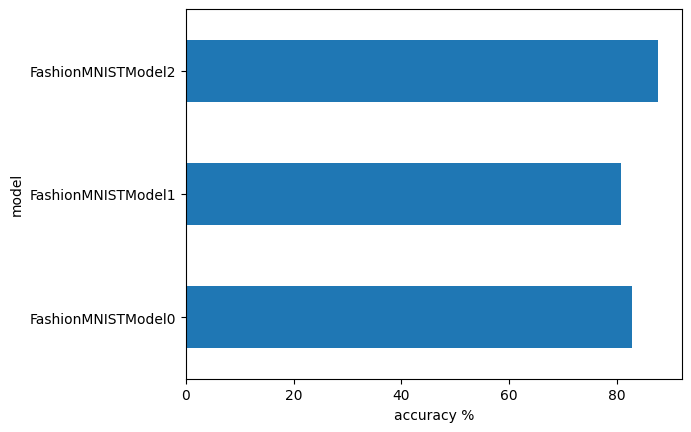

In [ ]:
import matplotlib.pyplot as plt
compare_results.set_index("model_name")["model_accuracy"].plot(kind="barh")
plt.xlabel("accuracy %")
plt.ylabel("model")

In [ ]:
test_image,test_label=next(iter(test_dataloader))
test_image.shape,test_label

(torch.Size([32, 1, 28, 28]),
 tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 7, 3, 4, 1, 2, 4, 8, 0, 2, 5, 7, 9,
         1, 4, 6, 0, 9, 3, 8, 8]))

In [ ]:
test_image[3].shape,test_label[3]

(torch.Size([1, 28, 28]), tensor(1))

In [ ]:
model_2(test_image[3].unsqueeze(dim=0).to(device))

tensor([[ 0.8527, 18.6943, -5.7578,  4.8861,  4.1755, -1.1137, -1.9548, -8.1522,
         -3.9659, -6.1964]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [ ]:
test_data

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [ ]:
def make_predictions(model:torch.nn.Module,
                     data:list,
                     device:torch.device=device):
  pred_probs=[]

  model.eval()
  with torch.inference_mode():
    for sample in data:

      pred_logits=model(sample.unsqueeze(dim=0).to(device))

      pred_probab=torch.softmax(pred_logits.squeeze(),dim=0)

      pred_probs.append(pred_probab.cpu())



  return torch.stack(pred_probs)


In [ ]:
import random
#random.seed(42)
test_samples=[]
test_labels=[]
for sample, label in random.sample(list(test_data),k=9):
   test_samples.append(sample)
   test_labels.append(label)

test_samples[0].shape

torch.Size([1, 28, 28])

In [ ]:
test_labels

[8, 2, 0, 2, 0, 0, 9, 7, 2]

In [ ]:
pred_probs=make_predictions(model=model_2,data=test_samples)
pred_probs[:3]

tensor([[1.9590e-02, 2.0640e-03, 1.0899e-01, 8.3251e-04, 1.0403e-03, 1.4480e-06,
         2.5999e-02, 7.7625e-09, 8.4130e-01, 1.8733e-04],
        [1.6358e-02, 6.2987e-04, 3.6736e-01, 6.0457e-03, 3.1521e-01, 4.8836e-05,
         2.9102e-01, 4.6193e-07, 3.3247e-03, 2.8380e-06],
        [8.9650e-01, 1.0873e-04, 4.7434e-03, 8.2413e-03, 2.7633e-04, 2.1527e-07,
         8.9281e-02, 1.3435e-06, 8.4569e-04, 2.5894e-07]])

In [ ]:
pred_classes=pred_probs.argmax(dim=1)
pred_classes

tensor([8, 2, 0, 2, 0, 0, 9, 7, 2])

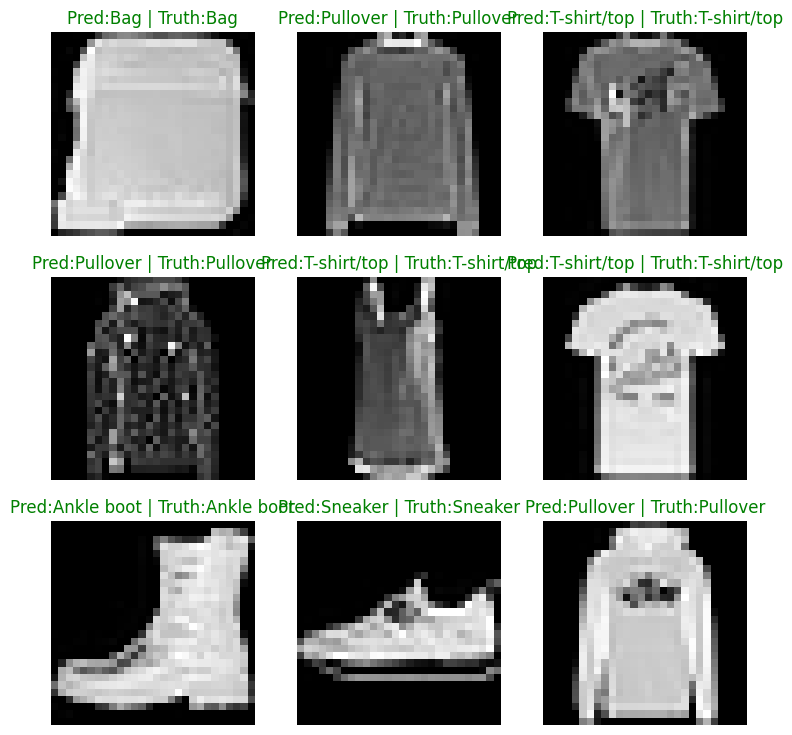

In [ ]:
plt.figure(figsize=(9,9))
nrows=3
ncolumns=3
for i,sample in enumerate(test_samples):

  plt.subplot(nrows,ncolumns,i+1)

  plt.imshow(sample.squeeze(),cmap="gray")

  pred_label=class_name[pred_classes[i]]

  truth_label=class_name[test_labels[i]]

  title_text=f"Pred:{pred_label} | Truth:{truth_label}"

  if pred_label==truth_label:
    plt.title(title_text,c="g")
  else:
    plt.title(title_text,c='r')

  plt.axis(False)

In [ ]:
!pip install torchmetrics

In [ ]:
from torchmetrics import ConfusionMatrix

In [ ]:
from tqdm.auto import tqdm
y_preds=[]
model_2.eval()
with torch.inference_mode():
  for X,y in tqdm(test_dataloader, desc="Making predictions...."):
    X,y=X.to(device),y.to(device)

    y_logit=model_2(X)

    y_pred=torch.softmax(y_logit.squeeze(),dim=0).argmax(dim=1)

    y_preds.append(y_pred.cpu())

#print(y_preds)
y_pred_tensor=torch.cat(y_preds)
y_pred_tensor[:10]

Making predictions....:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [ ]:
len(y_pred_tensor)

10000

In [ ]:
!pip install mlxtend

In [ ]:
import mlxtend

In [ ]:
import torchmetrics
torchmetrics.__version__

'1.8.2'

In [ ]:
test_data.targets

tensor([9, 2, 1,  ..., 8, 1, 5])

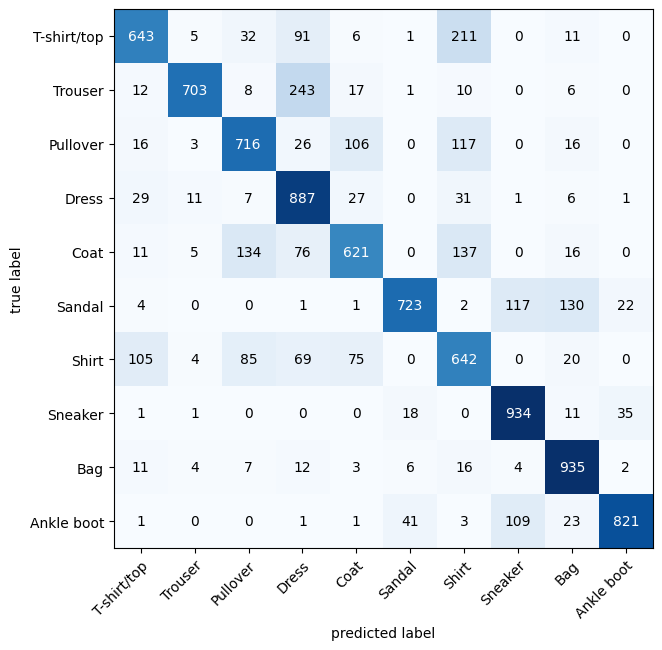

In [ ]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

confmat=ConfusionMatrix(num_classes=len(class_name),task="multiclass")
confmat_tensor=confmat(preds=y_pred_tensor,target=test_data.targets)

fig, ax=plot_confusion_matrix(conf_mat=confmat_tensor.numpy(),
                              class_names=class_name,
                              figsize=(10,7))

In [ ]:
confmat_tensor

tensor([[643,   5,  32,  91,   6,   1, 211,   0,  11,   0],
        [ 12, 703,   8, 243,  17,   1,  10,   0,   6,   0],
        [ 16,   3, 716,  26, 106,   0, 117,   0,  16,   0],
        [ 29,  11,   7, 887,  27,   0,  31,   1,   6,   1],
        [ 11,   5, 134,  76, 621,   0, 137,   0,  16,   0],
        [  4,   0,   0,   1,   1, 723,   2, 117, 130,  22],
        [105,   4,  85,  69,  75,   0, 642,   0,  20,   0],
        [  1,   1,   0,   0,   0,  18,   0, 934,  11,  35],
        [ 11,   4,   7,  12,   3,   6,  16,   4, 935,   2],
        [  1,   0,   0,   1,   1,  41,   3, 109,  23, 821]])

In [ ]:
from pathlib import Path

MODEL_PATH=Path("model")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME="Computer_vision.pth"
MODEL_SAVE_PATH=MODEL_PATH/MODEL_NAME

torch.save(obj=model_2.state_dict(),f=MODEL_SAVE_PATH)

print("saving model to :",MODEL_SAVE_PATH)

saving model to : model/Computer_vision.pth


In [ ]:
torch.manual_seed(42)
loaded_model_2=FashionMNISTModel2(input_shape=1,
                                  hidden_units=10,
                                  output_shape=10)

loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

loaded_model_2.to(device)

FashionMNISTModel2(
  (conv_block1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [ ]:
model_2_results

{'model_name': 'FashionMNISTModel2',
 'model_loss': 0.34375977516174316,
 'model_accuracy': 87.74960063897764}

In [ ]:
torch.manual_seed(42)

loaded_model_2_results=eval_model(model=loaded_model_2,
                                  data_loader=test_dataloader,
                                  loss_fn=loss_fn,
                                  accuracy_fn=accuracy_fn)

loaded_model_2_results

{'model_name': 'FashionMNISTModel2',
 'model_loss': 0.34375977516174316,
 'model_accuracy': 87.74960063897764}